In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv("HousingData.csv")

In [28]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [29]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# What columns represent? 

Here’s what each column in the **BostonHousing** dataset represents:

1. **CRIM**: Per capita crime rate by town.
2. **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft.
3. **INDUS**: Proportion of non-retail business acres per town.
4. **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
5. **NOX**: Nitric oxide concentration (parts per 10 million).
6. **RM**: Average number of rooms per dwelling.
7. **AGE**: Proportion of owner-occupied units built prior to 1940.
8. **DIS**: Weighted distances to five Boston employment centers.
9. **RAD**: Index of accessibility to radial highways.
10. **TAX**: Full-value property tax rate per 10,000.
11. **PTRATIO**: Pupil-teacher ratio by town.
12. **B**: \(1000(Bk - 0.63)^2\), where \(Bk\) is the proportion of Black people by town.
13. **LSTAT**: Percentage of lower status population.
14. **MEDV**: Median value of owner-occupied homes in $1000s (target variable).

In [34]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [31]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Replacing missing values with mean

In [32]:
df["CHAS"].fillna(value = df["CHAS"].mode()[0], inplace = True)


In [33]:
numerical_columns = df.select_dtypes(include = ['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(value = df[numerical_columns].mean()) 

<Axes: >

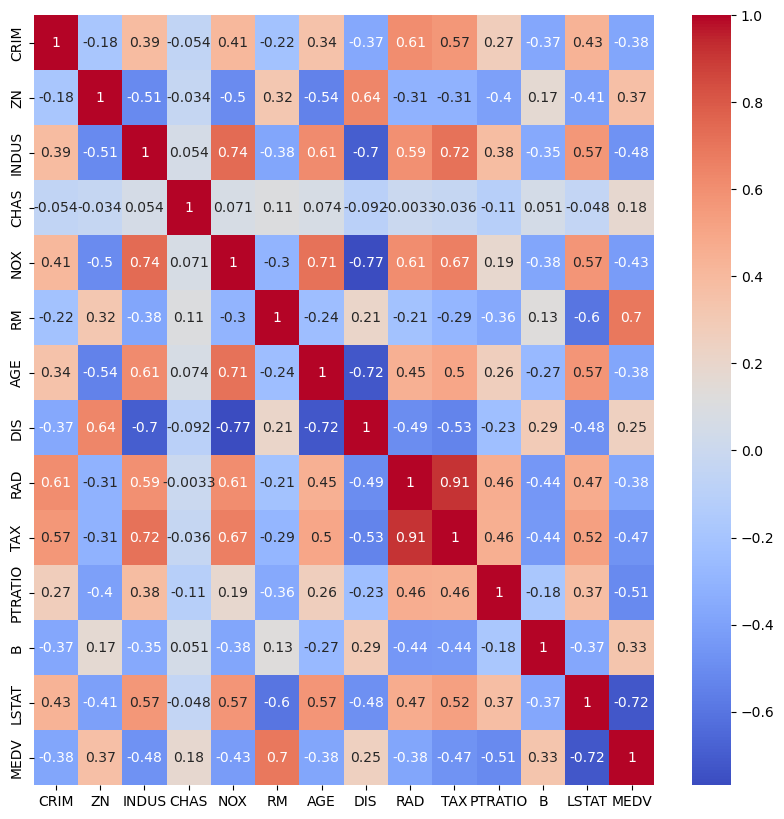

In [35]:
correlation_matrix = df.corr()

plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = True)

# Checking for outliers on each column

In [36]:
df["CRIM"]

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

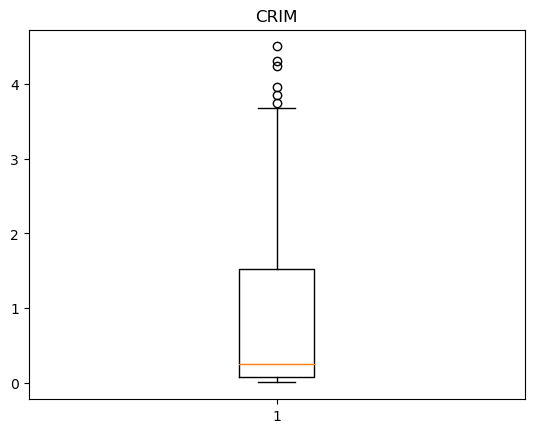

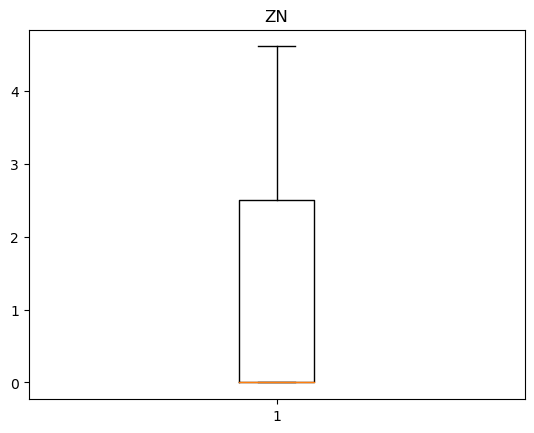

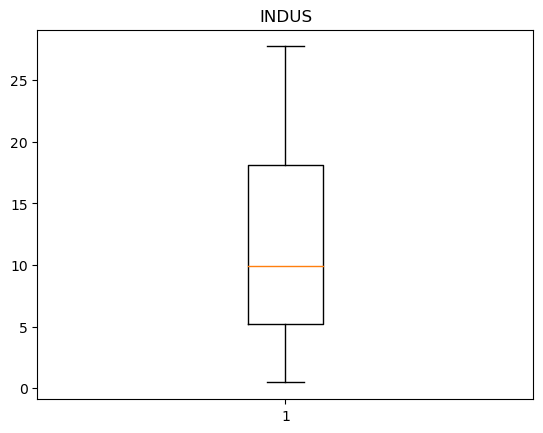

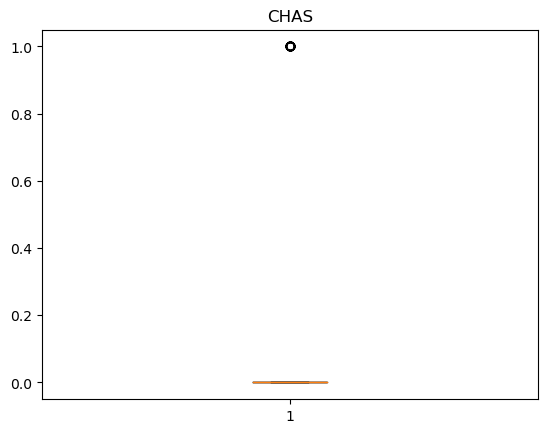

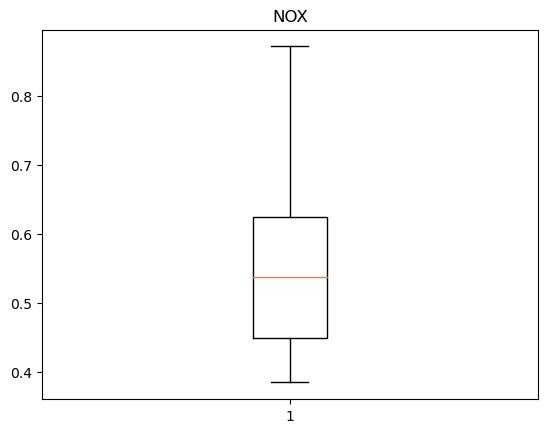

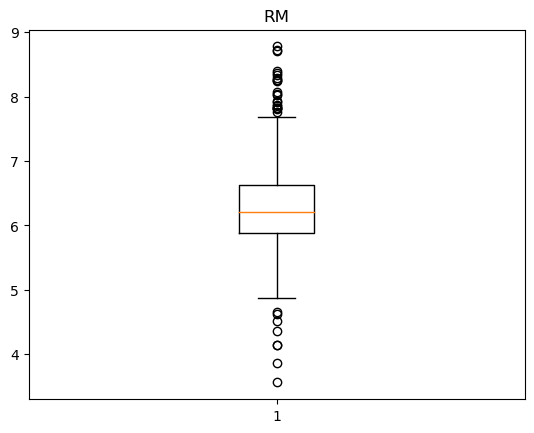

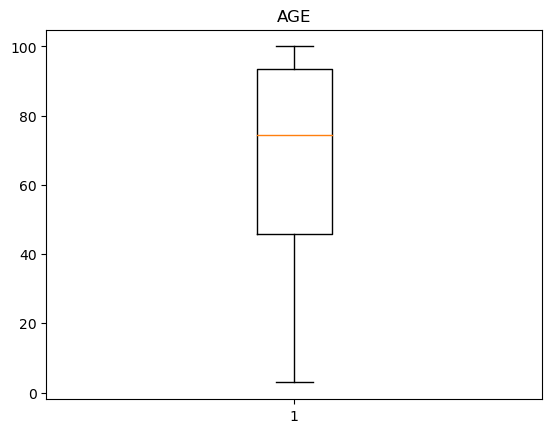

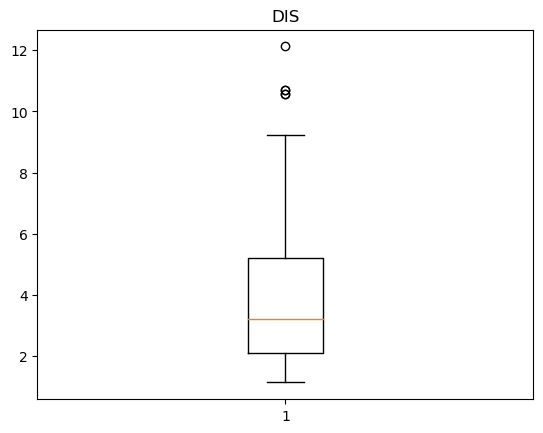

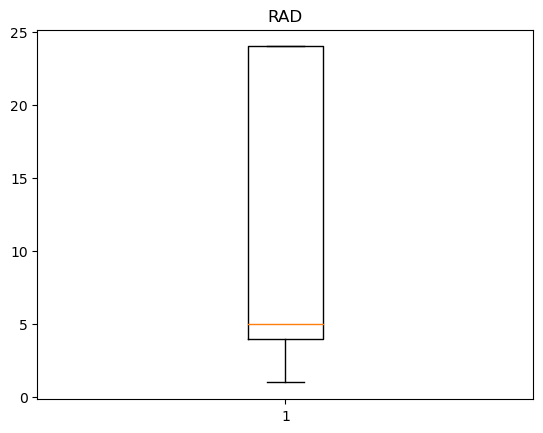

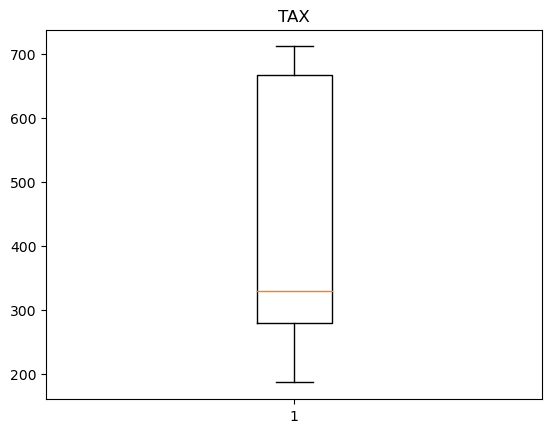

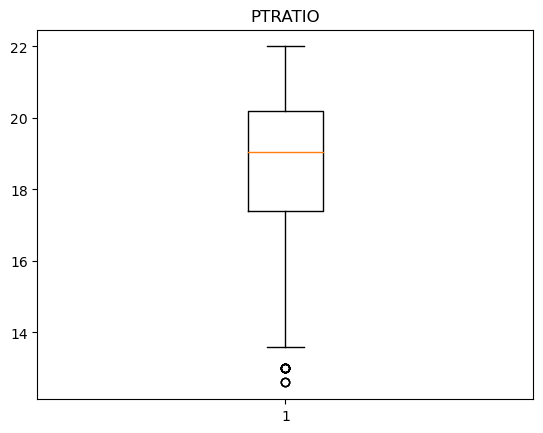

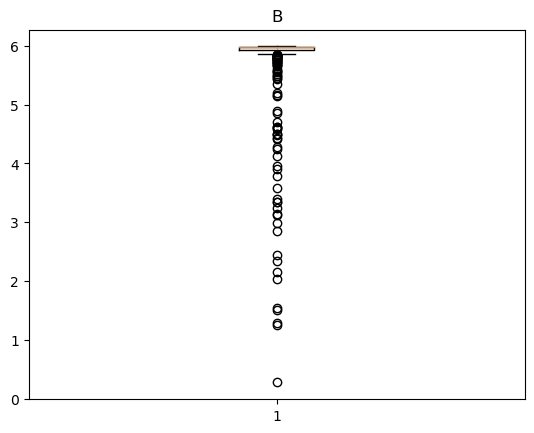

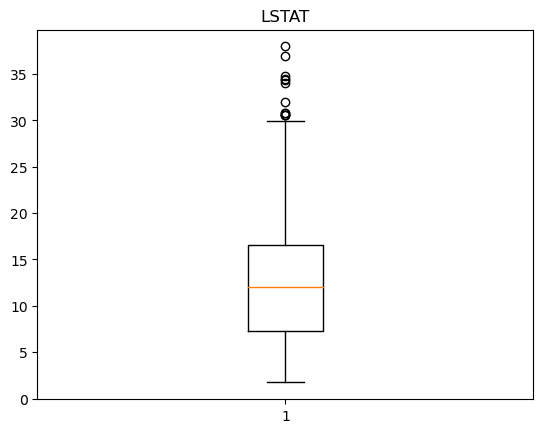

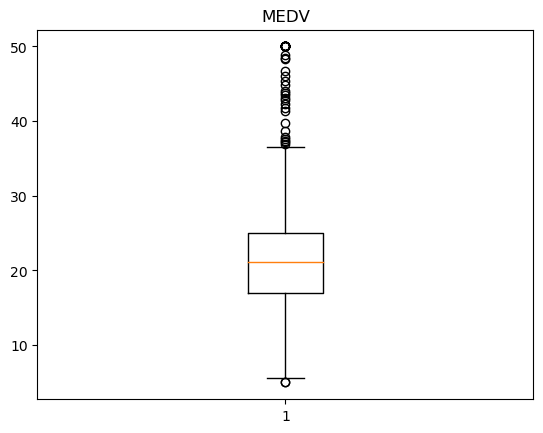

In [62]:
for i in df.columns:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

# Apply Log Transformation to reduce outliers

In [59]:

df['CRIM'] = np.log1p(df['CRIM'])  # Applies log(1 + x)
df['ZN'] = np.log1p(df['ZN'])
df['B'] = np.log1p(df['B'])

# Checking numerical count of outliers

In [60]:

outliers_count = {}

for i in df.columns:
    
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (1.5*(IQR))
    upper_bound = Q3 + (1.5*(IQR))
    
    outlier = (df[i] > upper_bound).sum() + (df[i] < lower_bound).sum()
    outliers_count[i] = outlier
    
    

In [39]:
df["CHAS"].unique()

array([0., 1.])

In [61]:
outliers_count

{'CRIM': 6,
 'ZN': 0,
 'INDUS': 0,
 'CHAS': 34,
 'NOX': 0,
 'RM': 30,
 'AGE': 0,
 'DIS': 5,
 'RAD': 0,
 'TAX': 0,
 'PTRATIO': 15,
 'B': 78,
 'LSTAT': 12,
 'MEDV': 40}

# Splitting the data

In [63]:
X = df.drop("MEDV", axis = 1)
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Standardizing Train data

In [64]:
standardise = StandardScaler()

X_train = X_train.copy()

X_train.loc[:,:] = standardise.fit_transform(X_train)

In [65]:
X_train["bias"] = 1
theta = np.zeros(X_train.shape[1])

In [66]:
theta.shape

(14,)

In [67]:
y_pred = np.dot(X_train, theta)

In [68]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Cost Function

In [69]:
m = len(X_train)
J_theta = (1/(2*m))*np.sum(((y_pred-y_train)**2))
J_theta

303.277698019802

# Gradient Descent 

In [70]:
alpha = 0.01
iterations =1000
ite = []
cos = []

theta = np.zeros(X_train.shape[1])

for i in range(iterations):
    
    y_pred = np.dot(X_train, theta)
    
    gradient = (1/m) * np.dot(X_train.T, (y_pred - y_train))
    
    theta -= alpha * gradient
    
    if i%100 == 0:
        
        ite.append(i)
        cost = (1/(2*m)) * np.sum(((y_pred-y_train)**2))
        cos.append(cost)
        

print(cos)


[303.277698019802, 48.51273142777339, 16.879936657737495, 12.535511742586294, 11.861565808077716, 11.707385424995772, 11.6413870248992, 11.599645882264838, 11.569799382717651, 11.547678795321797]


Text(0, 0.5, 'cost')

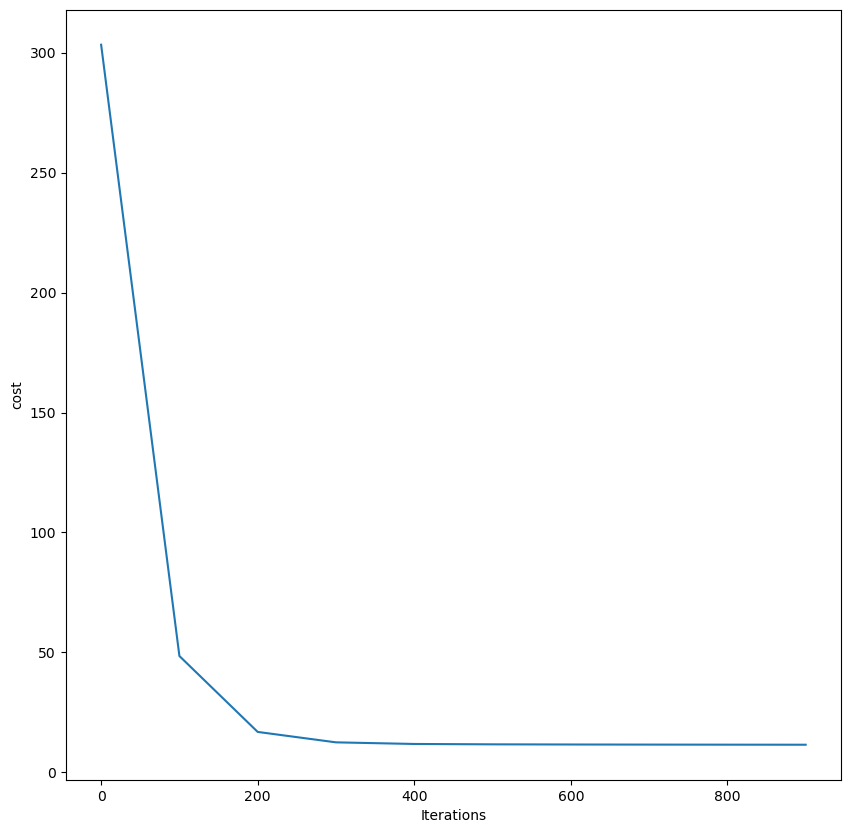

In [71]:
plt.figure(figsize = (10,10))
plt.plot(ite, cos)
plt.xlabel("Iterations")
plt.ylabel("cost")

# Final Cost on training Data

In [72]:
final_cost_train = (1/(2*m)) * np.sum((np.dot(X_train, theta) - y_train)**2)
print(f"Final cost on train data: {final_cost_train}")

Final cost on train data: 11.531002200908235


In [73]:
y_train_pred = np.dot(X_train, theta) #Predictions on training Data


# MSE on train Data

In [74]:
mse_train = (1/m)* np.sum((y_train_pred - y_train)**2)
print(f"Mean Squared error on training Data: {mse_train}")

Mean Squared error on training Data: 23.06200440181647


In [75]:
ss_total = np.sum((y_train - np.mean(y_train)) ** 2)
ss_residual = np.sum((y_train - y_train_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print(f"R-squared on Training Data: {r_squared}")


R-squared on Training Data: 0.7345332013678123


In [76]:
m_test = len(X_test)

X_test["bias"] = 1
final_cost_test = (1/(2*m_test)) * np.sum((np.dot(X_test, theta) - y_test)**2)
print(f"final cost on test data: {final_cost_test}")


final cost on test data: 81967.86133171861


In [77]:
y_test_pred = np.dot(X_test, theta)
mse_test = (1/m_test)* np.sum((y_test_pred - y_test)**2)
print(f"Mean squared error on test data: {mse_test}")

Mean squared error on test data: 163935.72266343722
